**<ins>1. Data Description:</ins>**
===
---

<ins>players.csv</ins> Dataset
---

Observations: 196

Variables (7):

| Variable               | Type                | Description  |
|------------------------|---------------------|--------------|
| **experience**         |<chr\>| Player's level of in-game experience.|
| **subscribe**          |<lgl\>| Indicates if player is subscribed to in-game newsletters.|
| **hashedEmail**        |<chr\>| Player's anonymous email.|
| **played_hours**       |<dbl\>| Time playing session started (relative).|
| **name**               |<chr\>| Player's in-game name.|
| **gender**             |<chr\>| Player's gender.|
| **Age**                |<dbl\>| Player's age.|

Issues: 

- Presence of outliers in played_hours may skew data analysis.
- experience is a character type instead of factor.

Summary Statistics are computed in Part 3.

<ins>sessions.csv</ins> Dataset
---

Observations: 1535

Variables (5):

| Variable               | Type                | Description  |
|------------------------|---------------------|--------------|
| **hashedEmail**        |<chr\>| Player's anonymous email.|
| **start_time**         |<chr\>| Time playing session started (relative).|
| **end_time**           |<chr\>| Time playing session ended (relative).|
| **original_start_time**|<dbl\>| Time playing session started (absolute).|
| **original_end_time**  |<dbl\>| Time playing session ended (absolute).|

Issues: 

- start_time and end_time contain more than one value per cell (date and time).
- start_time and end_time are non-numeric types.

---
The data were collected by a research group in Computer Science at UBC, led by Frank Wood, through a MineCraft server where players' in-game actions were recorded as they navigated through the game. 

**<ins>2. Questions:</ins>**
===
---

**Broad:**
What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific:**
Can a player's playtime and age predict whether they subscribe to the game-related newsletter in players.csv?

#### Addressing the Question

The response variable is subscribe (TRUE/FALSE), with age and played_hours as predictors. K-NN classification will be used to identify patterns in player behavior to predict subscription likelihood.

#### Wrangling Plan

The data will be standardized so that Age and played_hours are on the same scale. Only subscribe, played_hours, and Age will be kept, and subscribe will be converted to a factor for classification.

**<ins>3. Exploratory Data Analysis and Visualization:</ins>**
===
---

### Loading ***tidyverse*** library and reading data sets

In [1]:
library(tidyverse)

players_url <- "https://raw.githubusercontent.com/veronicahzh/dsci100-groupproject30/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/veronicahzh/dsci100-groupproject30/refs/heads/main/sessions.csv"

players <- read_csv(file = players_url)
sessions <- read_csv(file = sessions_url)

head(players)
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Wrangling Data Into a Tidy Format

Since the <ins>players.csv</ins> dataset is already tidy, there is no need for additional wrangling.

### Computing summary statistics all quantitative variables (played_hours, Age) in <ins>players.csv</ins>

In [2]:
# storing the selected columns in a variable
players_selected <- select(players, played_hours, Age)

# calculating the mean
players_mean <- players_selected |>
    map_df(mean, na.rm = TRUE) |>
    rename(mean_played_hours = played_hours, mean_Age = Age)

players_mean

# calculating the median
players_median <- players_selected |>
    map_df(median, na.rm = TRUE) |>
    rename(median_played_hours = played_hours, median_Age = Age)

# calculating the mode
players_mode <- players_selected |>
    map_df(mode) |>
    rename(mode_played_hours = played_hours, mode_Age = Age)

# calculating the Standard Deviation (SD)
players_sd <- players_selected |>
    map_df(sd, na.rm = TRUE) |>
    rename(sd_played_hours = played_hours, sd_Age = Age)

# calculating the min 
players_min <- players_selected |>
    map_df(min, na.rm = TRUE) |>
    rename(min_played_hours = played_hours, min_Age = Age)

# calculating the max
players_max <- players_selected |>
    map_df(max, na.rm = TRUE) |>
    rename(max_played_hours = played_hours, max_Age = Age)

# all summary statistics of played_hours and Age
summary_combined <- bind_cols(players_mean, players_median, players_mode, players_sd, players_max, players_min)
summary_combined

mean_played_hours,mean_Age
<dbl>,<dbl>
5.845918,20.52062


mean_played_hours,mean_Age,median_played_hours,median_Age,mode_played_hours,mode_Age,sd_played_hours,sd_Age,max_played_hours,max_Age,min_played_hours,min_Age
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,20.52062,0.1,19,numeric,numeric,28.35734,6.174667,223.1,50,0,8


### Exploratory Visualizations of <ins>players.csv</ins>

#### Plot of total time played (in hours) vs age (in years), colored by subscription

This scatter plot shows a non-linear relationship between the 2 predictor variables, played_hours and Age, with noticeable outliers in time played.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


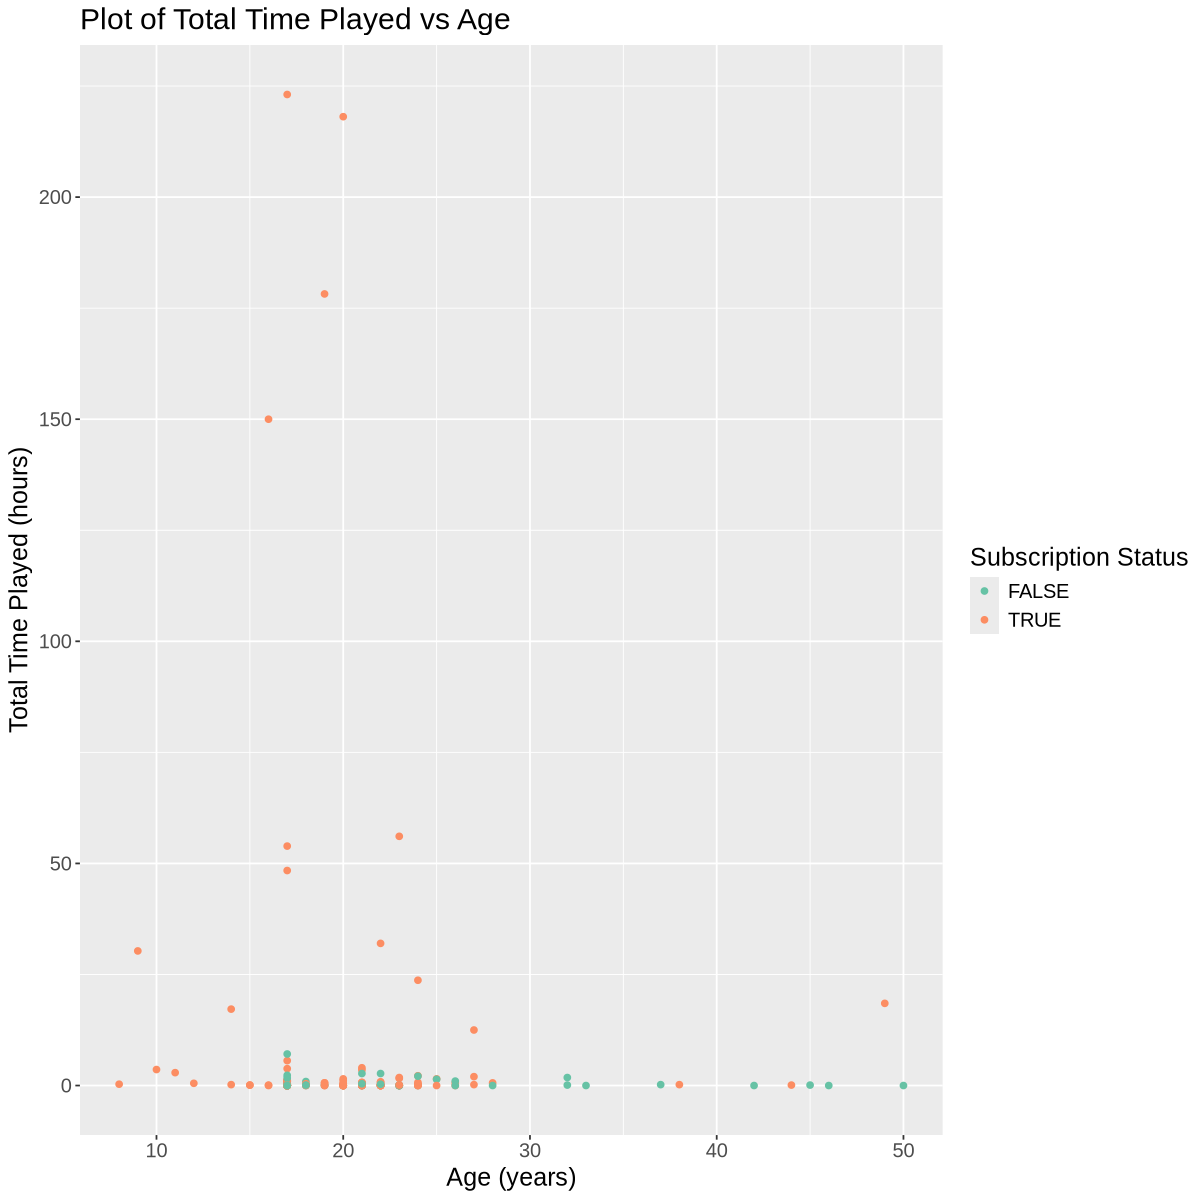

In [28]:
library(RColorBrewer)
options(repr.plot.width = 10, repr.plot.height = 10)

age_vs_hours_sub <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Age (years)", y = "Total Time Played (hours)", color = "Subscription Status") +
    ggtitle("Plot of Total Time Played vs Age") +
    theme(text = element_text(size = 15)) +
    scale_color_brewer(palette = "Set2")

age_vs_hours_sub

#### Distribution of total time played (in hours), colored by subscription status

This plot shows subscription status by playtime, indicating that subscribers play more than non-subscribers.

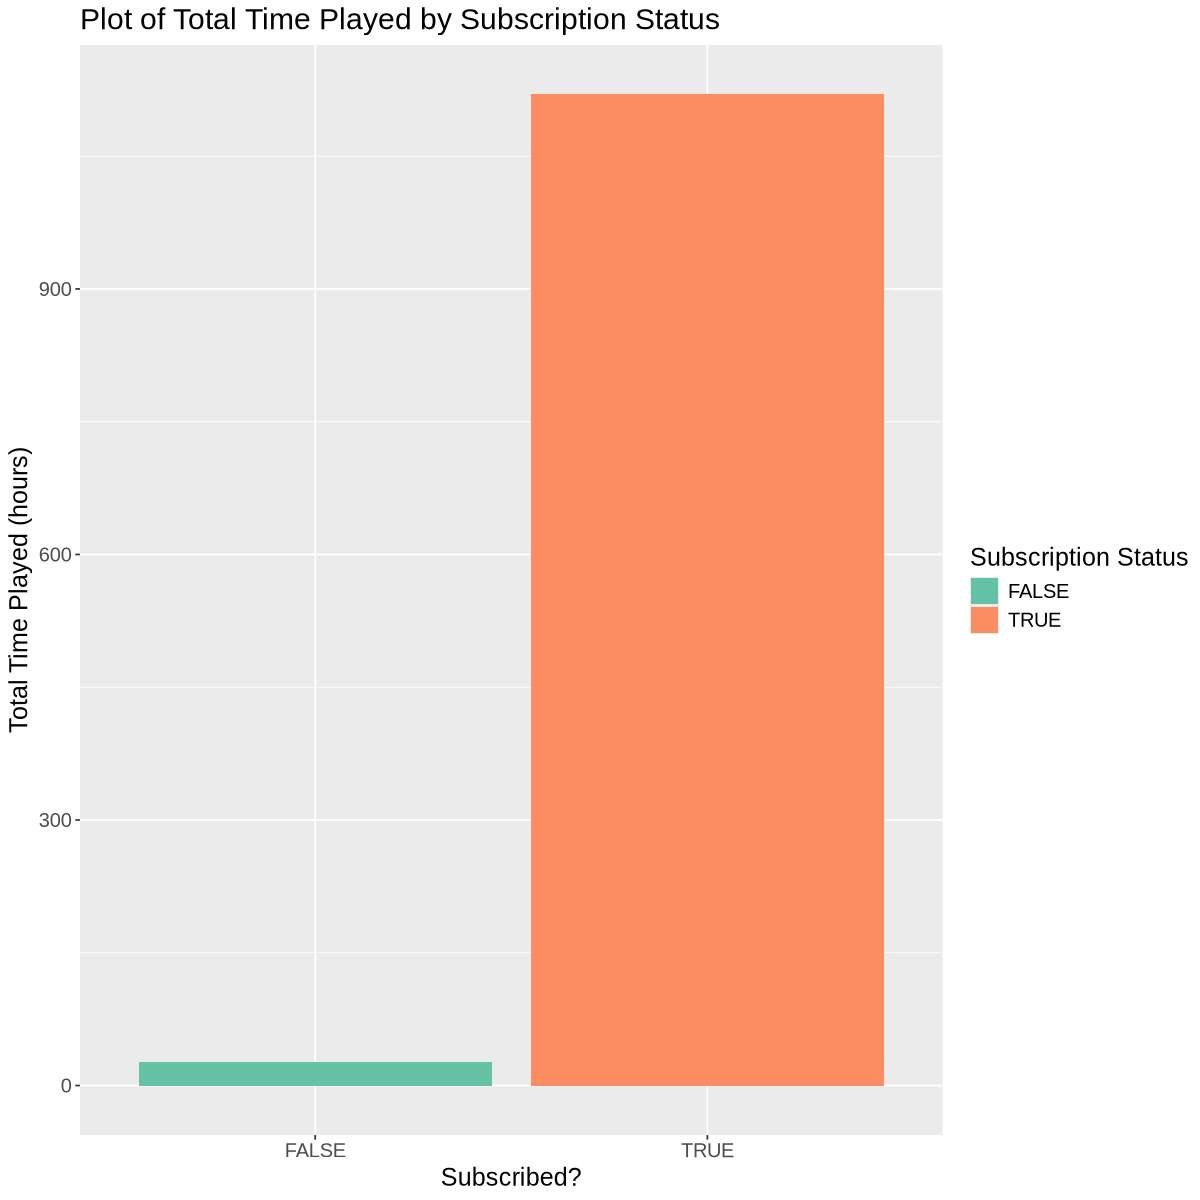

In [27]:
options(repr.plot.width = 10, repr.plot.height = 10)

# summarize total played hours by subscription status
total_playtime <- players |>
    group_by(subscribe) |>
    summarize(total_hours = sum(played_hours, na.rm = TRUE))

# bar plot
hrs_by_sub <- total_playtime |>
    ggplot(aes(x = subscribe, y = total_hours, fill = subscribe)) +
    geom_bar(stat = "identity") +
    labs(x = "Subscribed?", y = "Total Time Played (hours)", fill = "Subscription Status") +
    ggtitle("Plot of Total Time Played by Subscription Status") +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = "Set2")

hrs_by_sub

#### Distribution of age (in years) vs number of subscribers, colored by subscription status

This plot shows subscriber count by age, indicating most subscribers are between 15-25 years old.

In [1]:
options(repr.plot.width = 10, repr.plot.height = 10)

age_by_sub <- players |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 2, position = "identity") +
    labs(x = "Age (years)", y = "Number of Subscribers", fill = "Subscription Status") +
    ggtitle("Plot of Age by Subscription Status") +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = "Set2")

age_by_sub

ERROR: Error in ggplot(players, aes(x = Age, fill = subscribe)): could not find function "ggplot"


**<ins>4. Methods and Plan:</ins>**
===
---

K-NN classification will predict subscription status using played_hours and Age as numeric predictors and subscribe as the categorical response variable. This method is appropriate because K-NN works with numeric inputs while predicting categorical outputs. The first exploratory plot above suggests a non-linear relationship between the predictors, making K-NN a better choice than linear regression, which assumes linearity. Since the goal is to classify subscription status rather than predict a continuous value, K-NN classification is used instead of K-NN regression.

K-NN assumes that closer data points are more similar, which makes sense since players with similar playtime and age likely have similar engagement. However, K-NN is sensitive to outliers, can overfit with small k values, and slows down with larger datasets. Standardizing the data ensures both predictors contribute equally to distance calculations.

The data will be split into 75% training and 25% testing. A 5-fold cross-validation will be used to fine-tune k, optimizing model performance while preventing overfitting. The training set will determine the best k, and the test set will evaluate final accuracy.